In [1]:
##### Model 1 to detect nodes#####

In [1]:
import math
import pandas as pd
import numpy as np
columns = ['label']
columns += ['pixel'+str(i) for i in range(1,50)]
data1 = pd.read_csv("NTruefinal.csv",names = columns, dtype = np.float32)#Model 1 dataset
data1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,...,1.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0


In [2]:
from platform import python_version

print(python_version())

3.5.6


In [3]:
data1.shape

(1773, 50)

In [4]:
unique, counts = np.unique(data1.iloc[:,0], return_counts=True)#No.of zero labels and one labels
dict(zip(unique, counts))

{0.0: 887, 1.0: 886}

In [7]:
import numpy as np
import csv

def flat_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

Aa=np.loadtxt(open("m_d_cortex.csv", "rb"), delimiter=",")
R=Aa
#A = A.astype(np.uint16)
rows = Aa.shape[0]
cols = Aa.shape[1]
maxValue = np.amax(Aa)
minValue = np.amin(Aa)
fa=[]
for x in range(0, cols ):
    for y in range(0, rows):
        Aa[x,y]=math.ceil(((Aa[x,y]-minValue)/(maxValue-minValue))*255) # Normalization


B=np.pad(Aa, ((3,3),(3,3)), 'constant',constant_values=0) #Padding with 0's
for j in range(3,len(Aa)+3):
    fa.append(flat_list(B[j-3:j+4,j-3:j+4]))
with open("Realivat.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(fa) 

In [8]:
from sklearn.model_selection import train_test_split
X = data1.drop('label', axis=1)
y = data1['label']
X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.2, 
                                        random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))



0.015625
Accuracy: 0.9943661971830986


In [9]:
any(y_test==1)

True

In [10]:
X_test.shape

(355, 49)

In [11]:
daa= pd.read_csv("Realivat.csv",dtype = np.float32)
xpred = daa
x = rfc.predict(xpred)

In [12]:
import matplotlib.patches as patches
from PIL import Image

In [13]:

L=[]# Model 1 Output cordinates
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(Aa.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
#B = A.astype('float32')*255.0/65536.0
#B = B.astype('uint16')
ax.imshow(R,cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('model1cortex.eps') 
plt.show()
 


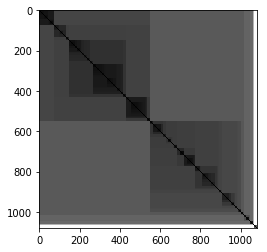

In [14]:
plt.imshow(Aa, cmap='gray')

In [15]:
L

[1,
 10,
 16,
 21,
 22,
 25,
 28,
 40,
 43,
 46,
 49,
 52,
 67,
 70,
 73,
 74,
 78,
 79,
 80,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 114,
 115,
 118,
 121,
 122,
 123,
 124,
 127,
 130,
 131,
 132,
 133,
 141,
 144,
 147,
 148,
 149,
 151,
 152,
 157,
 168,
 176,
 177,
 178,
 184,
 185,
 186,
 187,
 199,
 204,
 207,
 210,
 211,
 212,
 217,
 218,
 219,
 225,
 226,
 227,
 230,
 233,
 234,
 248,
 249,
 252,
 253,
 254,
 255,
 257,
 258,
 259,
 260,
 261,
 262,
 268,
 282,
 283,
 296,
 302,
 305,
 308,
 311,
 322,
 323,
 324,
 325,
 328,
 329,
 330,
 331,
 334,
 337,
 348,
 353,
 354,
 364,
 376,
 377,
 379,
 380,
 381,
 384,
 387,
 393,
 395,
 398,
 399,
 401,
 402,
 405,
 406,
 415,
 416,
 423,
 429,
 430,
 431,
 434,
 437,
 440,
 446,
 449,
 452,
 453,
 454,
 455,
 456,
 474,
 483,
 486,
 488,
 489,
 492,
 493,
 494,
 495,
 498,
 504,
 505,
 506,
 510,
 513,
 514,
 515,
 517,
 518,
 519,
 520,
 521,
 52

In [211]:
#### Model 2 to detect Corners######

In [16]:
R.shape

(1080, 1080)

In [17]:
##### Training #####


import math
import pandas as pd
import numpy as np
# columns = ['label']
columns = ['label']
columns += ['pixel'+str(i) for i in range(1,50)]
data = pd.read_csv("testwithivatallandnonautoandautoones.csv",names = columns, dtype = np.float32)
data.head()



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49
0,0.0,255.0,255.0,255.0,0.0,2.0,2.0,2.0,255.0,255.0,...,1.0,1.0,1.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0
1,0.0,255.0,255.0,255.0,2.0,0.0,1.0,1.0,255.0,255.0,...,1.0,1.0,1.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0
2,0.0,255.0,255.0,255.0,2.0,1.0,0.0,1.0,255.0,255.0,...,1.0,1.0,1.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0
3,0.0,255.0,255.0,255.0,2.0,1.0,1.0,0.0,255.0,255.0,...,1.0,1.0,1.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0
4,0.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0,255.0,255.0,...,1.0,1.0,1.0,255.0,255.0,255.0,2.0,1.0,1.0,1.0


In [18]:
unique, counts = np.unique(data.iloc[:,0], return_counts=True)
dict(zip(unique, counts))

{0.0: 1141, 1.0: 1168}

In [19]:
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.2, 
                                        random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc2.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))


0.015625
Accuracy: 0.9913419913419913


In [20]:
### Testing ###

Ax=np.loadtxt(open("m_d_cortex.csv" , "rb"), delimiter=",")
rows = Ax.shape[0]
cols = Ax.shape[1]
maxValue = np.amax(Ax)
minValue = np.amin(Ax)
for x in range(0, cols ):
    for y in range(0, rows):
        Ax[x,y]=math.ceil(((Ax[x,y]-minValue)/(maxValue-minValue))*255)
Bx=np.pad(Ax, ((3,3),(3,3)), 'constant',constant_values=255)
#Cx=np.loadtxt(open("label.csv" , "rb"), delimiter="/n") 


L.insert(0,0)
D=[] # Model 2 output Co-ordinates

for i in range(len(L)):
    J=L[i]+3
    for j in range(J,len(Ax)+3):
        M=np.array(flat_list(Bx[int(j-3):int(j+4),int(J-3):int(J+4)]))
        M = M.reshape(1,-1)
        if (rfc2.predict(M)[0]==1):
            D.append([j,J])
    print(i)        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [21]:
x1 = np.array(D)[:,0] -3 # To remove padding shift
y1 = np.array(D)[:,1] - 3

In [22]:
D

[[5, 3],
 [6, 3],
 [7, 3],
 [8, 3],
 [9, 3],
 [10, 3],
 [11, 3],
 [12, 3],
 [13, 3],
 [14, 3],
 [15, 3],
 [16, 3],
 [17, 3],
 [18, 3],
 [19, 3],
 [20, 3],
 [21, 3],
 [22, 3],
 [23, 3],
 [24, 3],
 [25, 3],
 [26, 3],
 [27, 3],
 [28, 3],
 [29, 3],
 [30, 3],
 [31, 3],
 [32, 3],
 [33, 3],
 [34, 3],
 [35, 3],
 [36, 3],
 [37, 3],
 [38, 3],
 [39, 3],
 [40, 3],
 [41, 3],
 [42, 3],
 [43, 3],
 [44, 3],
 [45, 3],
 [46, 3],
 [47, 3],
 [48, 3],
 [49, 3],
 [50, 3],
 [51, 3],
 [52, 3],
 [53, 3],
 [54, 3],
 [55, 3],
 [56, 3],
 [57, 3],
 [58, 3],
 [59, 3],
 [60, 3],
 [61, 3],
 [62, 3],
 [63, 3],
 [64, 3],
 [65, 3],
 [66, 3],
 [67, 3],
 [68, 3],
 [69, 3],
 [70, 3],
 [71, 3],
 [72, 3],
 [73, 3],
 [74, 3],
 [75, 3],
 [76, 3],
 [77, 3],
 [78, 3],
 [79, 3],
 [80, 3],
 [81, 3],
 [82, 3],
 [83, 3],
 [84, 3],
 [85, 3],
 [86, 3],
 [87, 3],
 [88, 3],
 [89, 3],
 [90, 3],
 [91, 3],
 [92, 3],
 [93, 3],
 [94, 3],
 [95, 3],
 [96, 3],
 [97, 3],
 [98, 3],
 [99, 3],
 [100, 3],
 [101, 3],
 [102, 3],
 [103, 3],
 [104, 3],


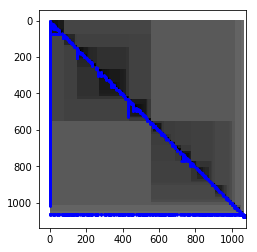

In [23]:
plt.imshow(Aa, cmap='gray')
plt.scatter(y1,x1, c='b',s=2)
# plt.figure(figsize = (30,15))
plt.savefig('model2cortex.eps') 

In [ ]:
#Other Models not needed now

In [15]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X, y)
tic = time.process_time()
knn_pred = knn.predict(X_test)
toc = time.process_time()
print(toc - tic)

#Predict the response for test dataset


from sklearn import metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

TypeError: Singleton array array(1055) cannot be considered a valid collection.

In [223]:
any(y_test==1)

True

In [224]:
x = knn.predict(xpred)

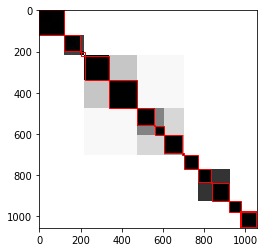

In [225]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionKNN4.eps') 
plt.show()
 

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
tic = time.process_time()
Des_pred = clf.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy:",metrics.accuracy_score(y_test, Des_pred))


0.0
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy: 0.9972222222222222


In [227]:
x = clf.predict(xpred)

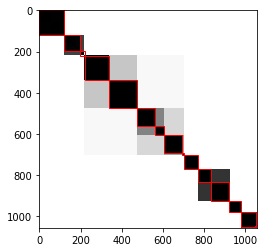

In [228]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionDTC4.eps') 
plt.show()

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)

classifier_rbf.fit(X,y)
classifier_linear.fit(X,y)
tic = time.process_time()
Y_pred_rbf = classifier_rbf.predict(X_test)
Y_linear = classifier_linear.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))


0.0625
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy_rbf: 0.5055555555555555
Accuracy_linear: 0.9972222222222222


In [230]:
x = classifier_linear.predict(xpred)

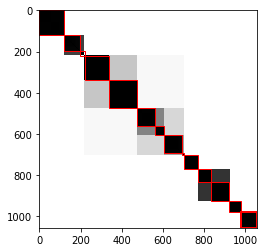

In [231]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionSVMlinear4.eps') 
plt.show()

In [209]:
a=[[1,2,3],[4,5,6]]

In [18]:
a[:][0:1]

[[1, 2, 3]]

In [23]:
from PIL import Image
import numpy as np
import sys
import os
import csv
img_file = Image.open('Ivatest.jpg')
    # img_file.show()

# get original image parameters...
width, height = img_file.size
format = img_file.format
mode = img_file.mode

# Make image Greyscale
img_grey = img_file.convert('L')
#img_grey.save('result.png')
#img_grey.show()

# Save Greyscale values
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
value = value.flatten()
print(value)
with open("Ivatest.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

[255 255 255 ... 255 255 255]


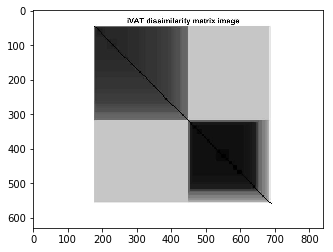

In [20]:
import matplotlib.image as img
import matplotlib.pyplot as plt
image = img.imread('Ivatest.jpg')
#print(image)
plt.imshow(image)